# Choosing a classification algorithm

Choosing an appropriate classification algorithm for a particular problem task requires practice; each algorithm has its own quirks and is based on certain assumptions. To restate the No Free Lunch theorem by David H. Wolpert, no single classifier works best across all possible scenarios.

The performance of a classifier—computational performance as well as predictive power—depends heavily on the underlying data that is available for learning. The five main steps that are involved in training a machine learning algorithm can be summarized as follows:

1. Selecting features and collecting training samples.
2. Choosing a performance metric.
3. Choosing a classifier and optimization algorithm.
4. Evaluating the performance of the model.
5. Tuning the algorithm.

# First steps - training a perceptron

we will use the already familiar Iris dataset throughout the following sections, and we will only use two features from the Iris dataset for visualization purposes.

We will assign the petal length and petal width of the 150 flower samples to the feature matrix $X$ and the corresponding class labels of the flower species to the vector $y$:

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


To evaluate how well a trained model performs on unseen data, we will further split the dataset into separate training and test datasets.

In [2]:
from sklearn.model_selection import train_test_split

# split 30% test, 70% trainig
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Stratification means that the *train_test_split* method returns training and test subsets that have the same proportions of class labels as the input dataset. We can verify using Numpy *bincount* function:

In [3]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test [15 15 15]


Many machine learning and optimization algorithms also require feature scaling for optimal performance, as we remember from the gradient descent example.

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Using the fit method, StandardScaler estimated the parameters $\mu$ (sample mean) and $\sigma$ (standard deviation) for each feature dimension from the training data. By calling the transform method, we then standardized the training data using those estimated parameters $\mu$ and $\sigma$.

Having standardized the training data, we can now train a perceptron model. Most algorithms in scikit-learn already support multiclass classification by default via the One-versus-Rest (OvR) method, which allows us to feed the three flower classes to the perceptron all at once.

In [17]:
from sklearn.linear_model import Perceptron


ppn = Perceptron(tol=0.0001, random_state=42)  # eta0 is the learning rate
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=42, shuffle=True, tol=0.0001,
      validation_fraction=0.1, verbose=0, warm_start=False)

As we remember, finding an appropriate learning rate requires some experimentation. If the learning rate is too large, the algorithm will overshoot the global cost minimum. If the learning rate is too small, the algorithm requires more epochs until convergence.

Now, we can make predictions via the predict method.

In [18]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: {}'.format((y_test != y_pred).sum()))

Misclassified samples: 3


Tthe misclassification error on the test dataset is approximately 0.067 or 6.7 percent ($\frac{6}{45} \approx 0.067$). Or the $0.933$ ($93.3\%$) of accuracy ($1-error = 0.933$) 

Using scikit-learn library we can calculate the classification accuracy of the perceptron on the test set:

In [19]:
from sklearn.metrics import accuracy_score

print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.9333333333333333


Alternatively, each classifier in scikit-learn has a *score* method, which computes a classifier's prediction accuracy by combining the *predict* call with *accuracy_score*.

In [21]:
print('Accuracy: {}'.format(ppn.score(X_test_std, y_test)))

Accuracy: 0.9333333333333333


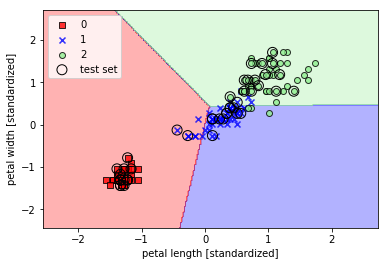

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from plot_regions import plot_decision_regions

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(x=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Remember, perceptron algorithm never converges on datasets that aren't perfectly linearly separable, which is why the use of the perceptron algorithm is typically not recommended in practice. 